Slightly worried tht the zarr stores might be corrupted in places. Check it out yall.

In [1]:
import xarray as xr
import numpy as np
import dask
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt

In [2]:
ls /datadrive/cam5/

2zr.log          nat_hist_agg_temp_coherent.nc   nat_hist_to_hadgem3_v3_zarr/
dl.log           nat_hist_to_hadgem3_4ch_agg.nc  nat_hist_zarr/
download.sh      nat_hist_to_hadgem3_4ch_zarr/   v3_agg.log
nat_hist_agg.nc  nat_hist_to_hadgem3_v3_agg.nc


In [43]:
ds_had = xr.open_zarr("/datadrive/hadgem3/nat_hist_zarr", consolidated=True)

In [9]:
ds_cam = xr.open_zarr("/datadrive/cam5/nat_hist_zarr", consolidated=True)

In [60]:
ds_cam2had = xr.open_zarr("/datadrive/cam5/nat_hist_to_hadgem3_v3_zarr", consolidated=True)

In [4]:
def mean_std_space(ds):
    ds_mean = ds.mean(dim=('lat', 'lon')).rename({v:f'{v}_mean' for v in ds.keys()})
    ds_std = ds.std(dim=('lat', 'lon')).rename({v:f'{v}_std' for v in ds.keys()})
    return xr.merge([ds_mean, ds_std])

def mean_space(ds):
    ds_mean = ds.mean(dim=('lat', 'lon')).rename({v:f'{v}_mean' for v in ds.keys()})
    return ds_mean

In [11]:
ds_cam.time.shape

(20621,)

In [10]:
ds_cam2had.time.shape

(20621,)

In [8]:
for r in ds_cam2had.run.values:
    with ProgressBar(dt=60):
        print(r)
        mean_space(ds_cam2had.sel(run=r)).compute()

1
[########################################] | 100% Completed |  4min  0.3s
2
[                                        ] | 0% Completed |  0.0s

/anaconda/envs/py37_pytorch2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4min  0.3s
3
[                                        ] | 0% Completed |  0.0s

/anaconda/envs/py37_pytorch2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4min  0.4s
4
[########################################] | 100% Completed |  4min  0.3s
5
[                                        ] | 0% Completed |  0.0s

/anaconda/envs/py37_pytorch2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4min  0.4s
7
[                                        ] | 0% Completed |  0.0s

/anaconda/envs/py37_pytorch2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4min  0.4s
8
[                                        ] | 0% Completed |  0.0s

/anaconda/envs/py37_pytorch2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4min  0.4s
9
[                                        ] | 0% Completed |  0.0s

/anaconda/envs/py37_pytorch2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4min  0.3s
10
[                                        ] | 0% Completed |  0.0s

/anaconda/envs/py37_pytorch2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4min  0.4s


In [7]:
ds_had_p = mean_std_space(ds_had)
ds_cam_p = mean_std_space(ds_cam)
ds_cam2had_p = mean_std_space(ds_cam2had)

In [16]:
with ProgressBar(dt=60):
    ds_had_c = ds_had_p.compute()

[                                        ] | 0% Completed |  1min  1.4s

/anaconda/envs/py37_pytorch2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  1hr  4min  4.9s


In [ ]:
with ProgressBar(dt=60):
    ds_cam_c = ds_cam_p.compute()

In [ ]:
with ProgressBar(dt=60):
    ds_cam2had_c = ds_cam2had_p.compute()

[                                        ] | 0% Completed |  1min  0.3s

/anaconda/envs/py37_pytorch2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[#######                                 ] | 19% Completed |  8min  0.8s

In [25]:
def plot_results(ds):
    pr = ds.isel(height=0)[[k for k in ds.keys() if 'pr' in k]]
    tas = ds.isel(height=1)[[k for k in ds.keys() if 'pr' not in k]]
    for k in pr.keys():
        pr[k].plot(col='run')
    for k in tas.keys():
        tas[k].plot(col='run')

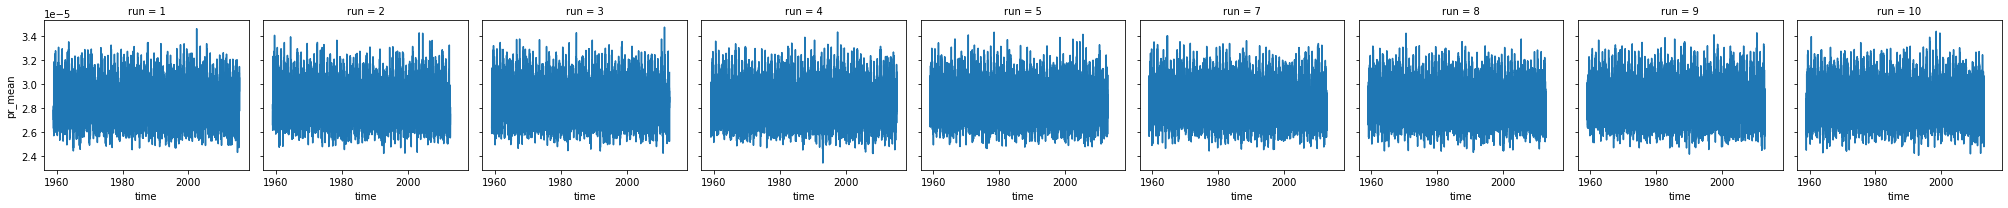

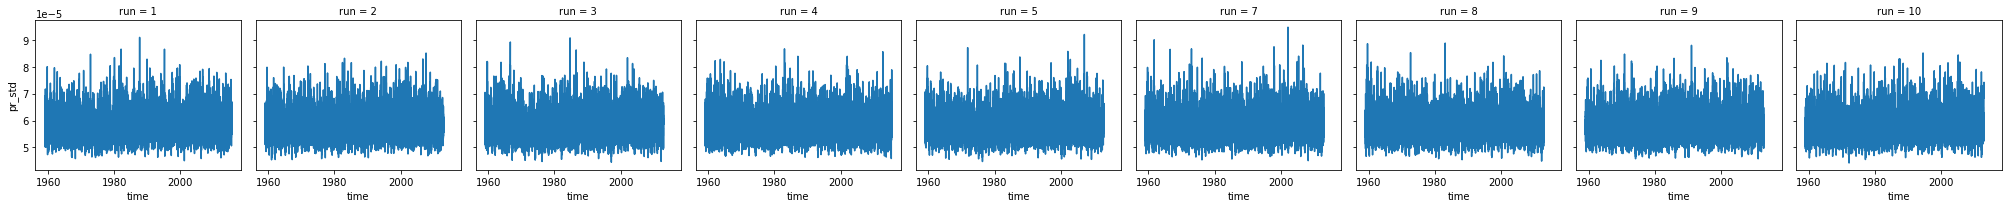

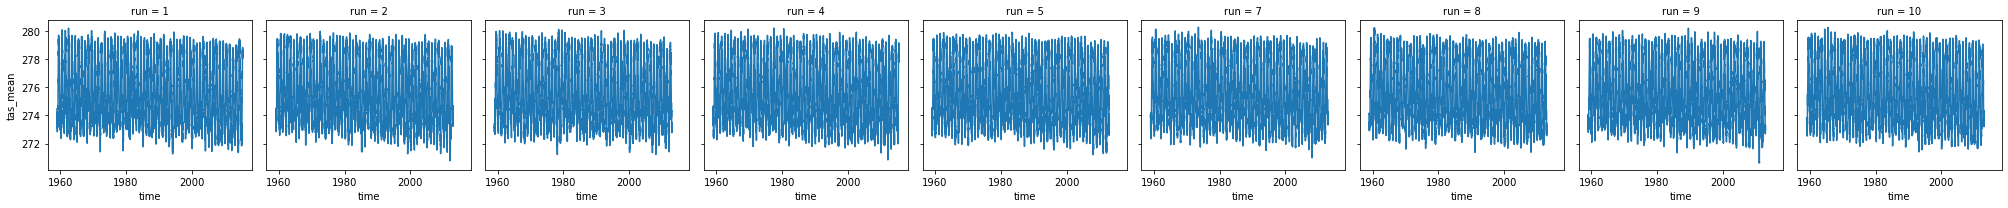

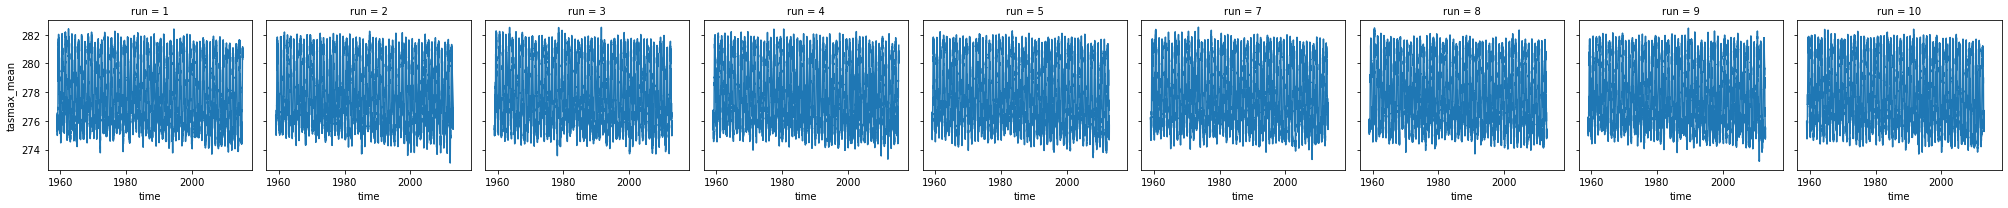

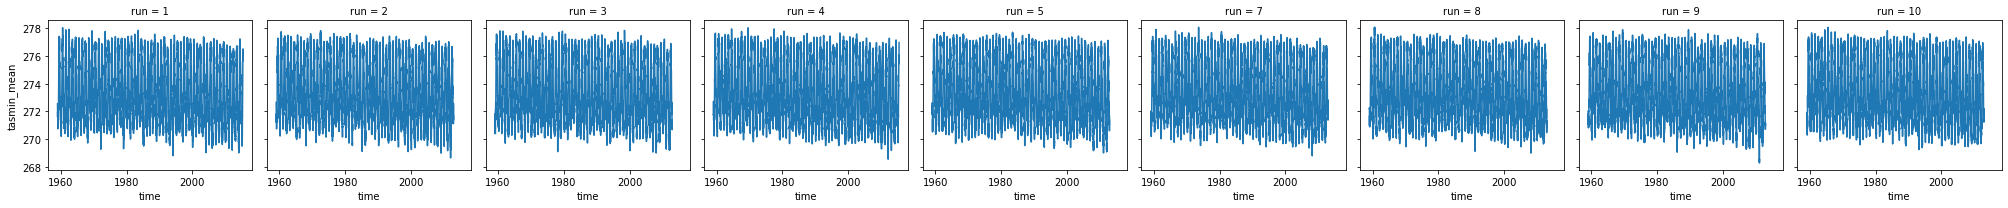

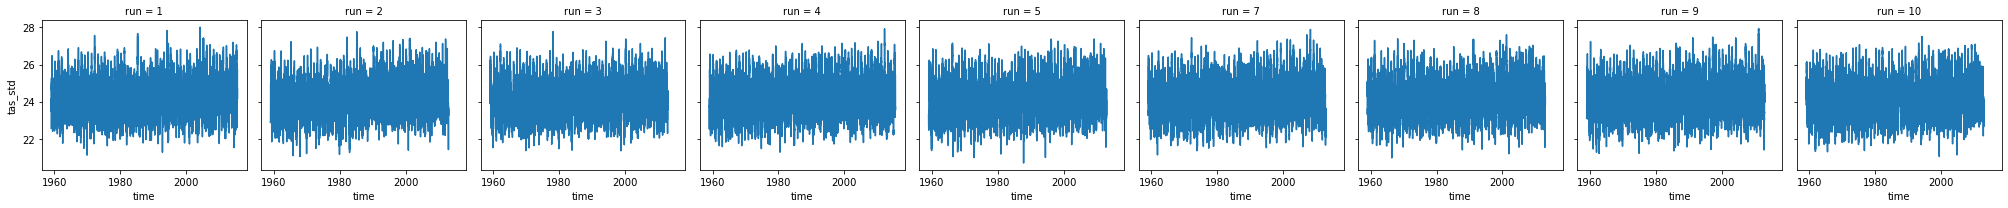

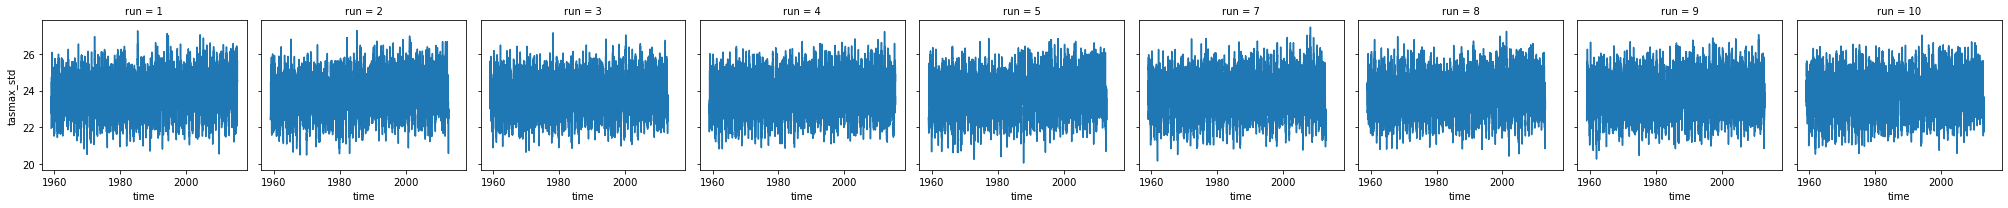

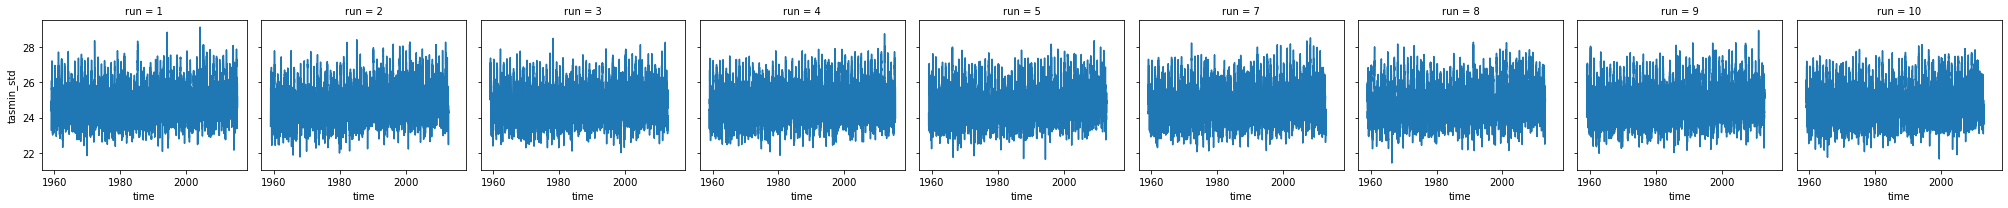

In [26]:
plot_results(ds_cam_c)

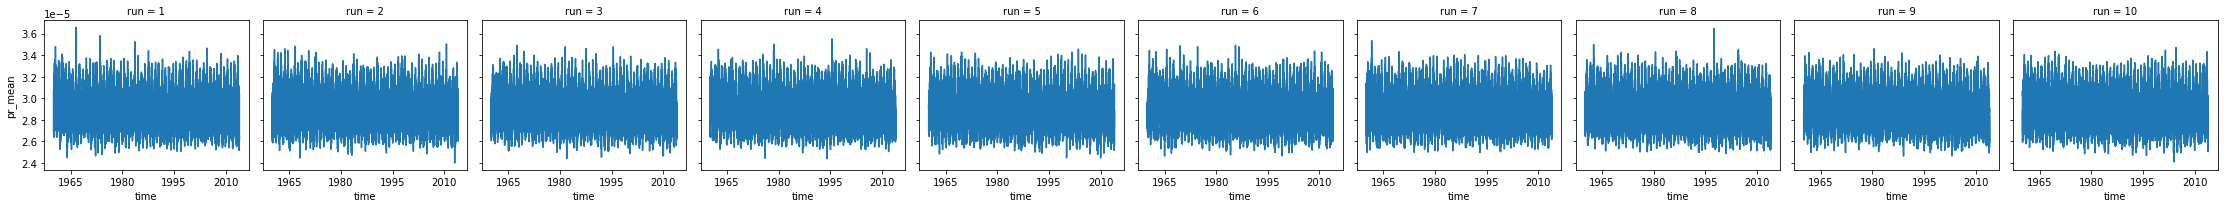

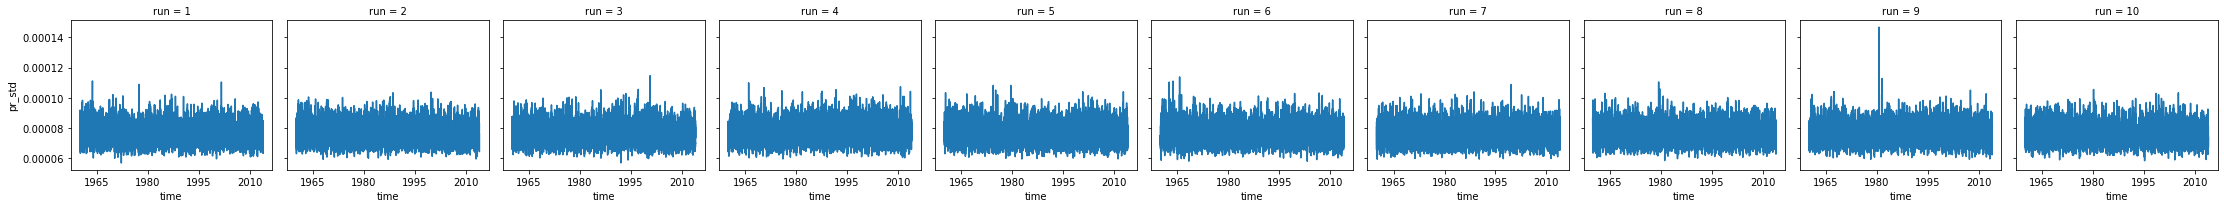

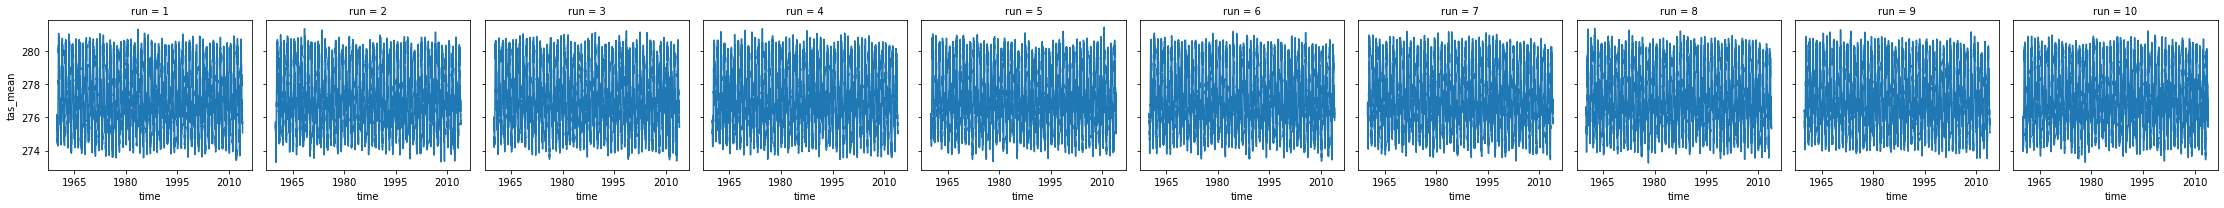

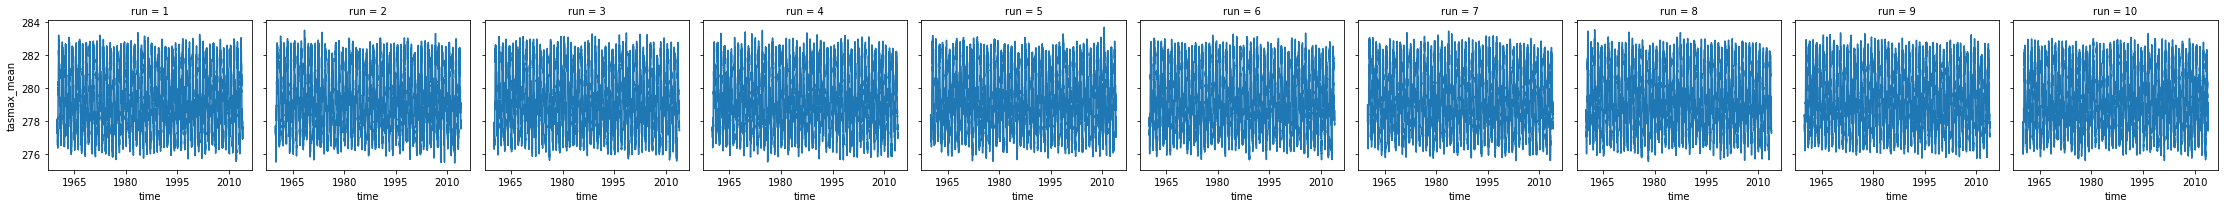

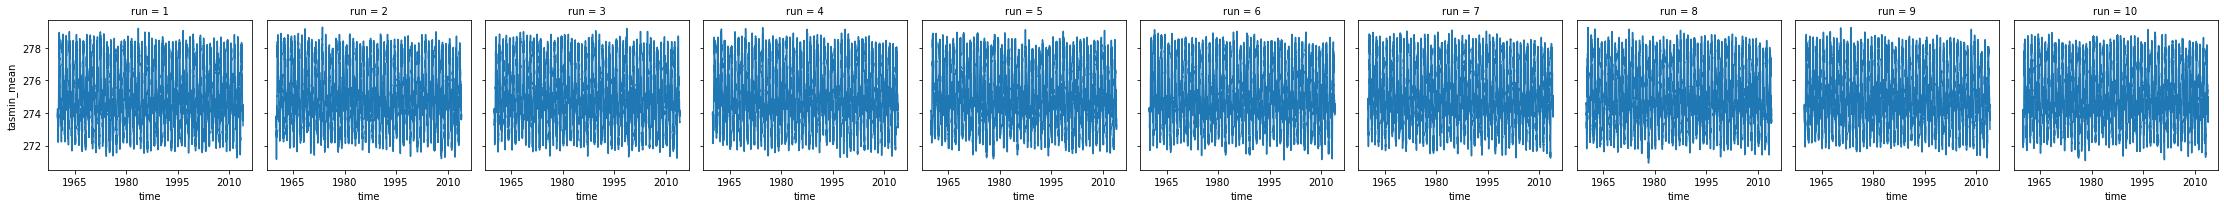

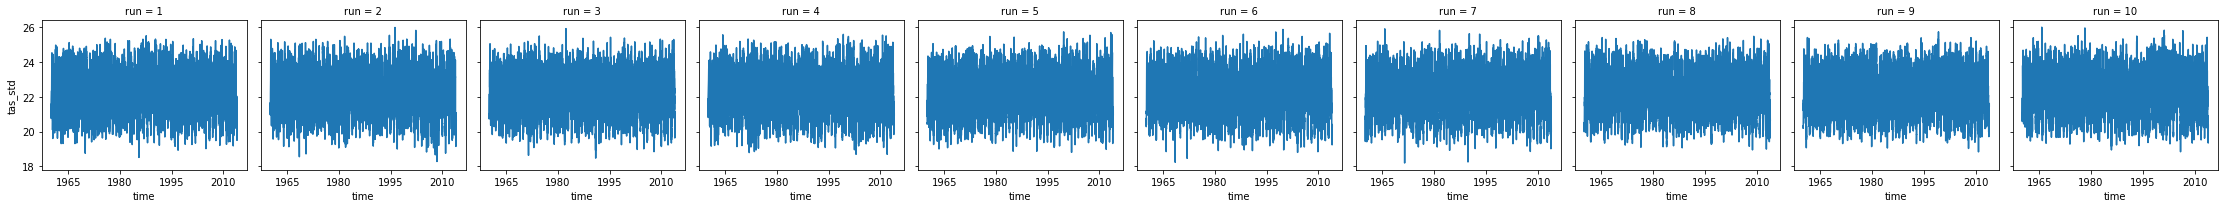

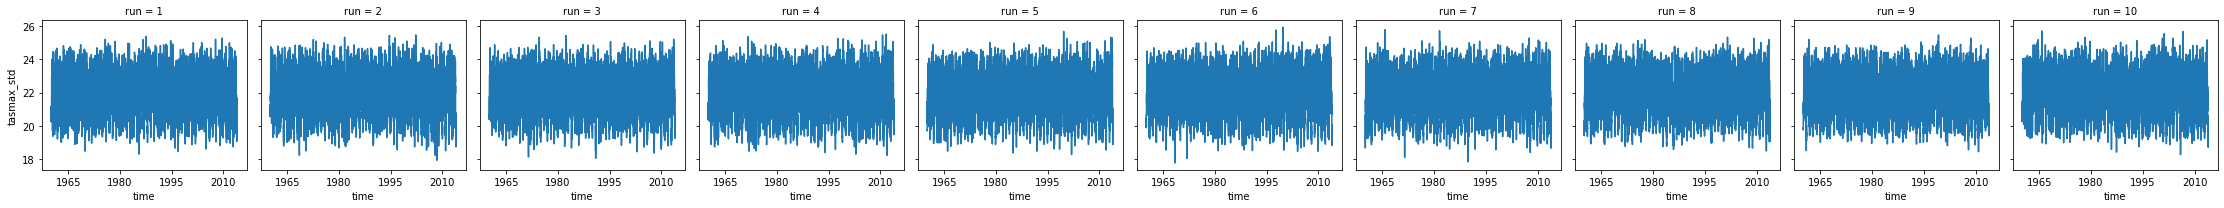

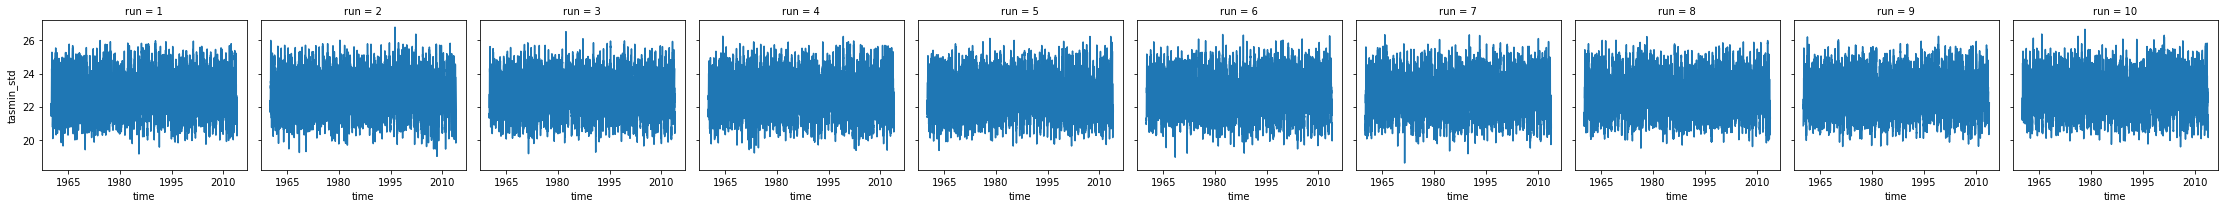

In [27]:
plot_results(ds_had_c)

In [ ]:
plot_results(ds_cam2had_c)

Means and stds seems fine so there mustn't be a problem with the data like I thought

__Someone said tas = 1/2 * (tasmax+tasmin). Is this True?__

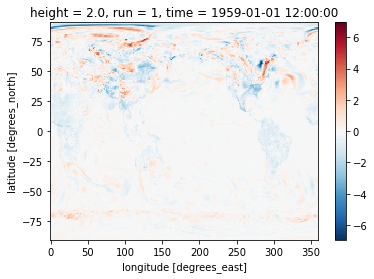

In [13]:
ds_ = ds_cam.isel(height=1, run=0, time=0)
(ds_.tas - 0.5*(ds_.tasmin + ds_.tasmax)).plot()

Mean of the distribution is -0.045593686401844025


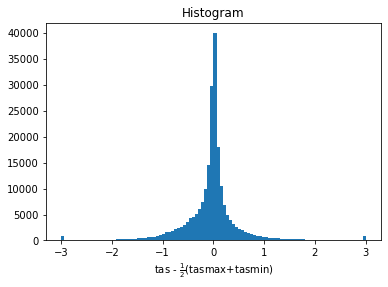

In [45]:
ds_ = ds_cam.isel(height=1, run=0, time=[0,90, 180, 270])
ds_ =(ds_.tas - 0.5*(ds_.tasmin + ds_.tasmax))
ds_.clip(-3, 3).plot(bins=100)
plt.xlabel(r'tas - $\frac{1}{2}$(tasmax+tasmin)')
print(f"Mean of the distribution is {ds_.mean().compute().item()}")
plt.show()

Nope

### Quick look at the distributions of different variables

In [ ]:
np.log(np.lin)

/anaconda/envs/py37_pytorch2/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in power
  return func(*(_execute_task(a, cache) for a in args))


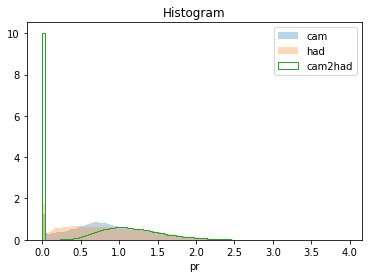

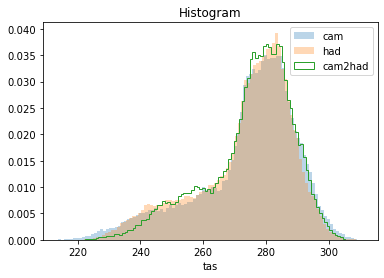

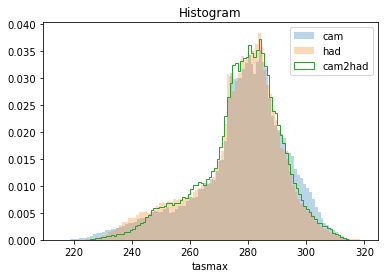

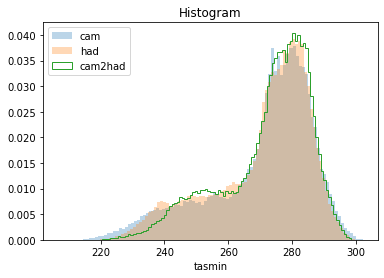

In [64]:
for k in ds_cam.keys():
    plt.figure()
    for ds, label in zip([ds_cam, ds_had, ds_cam2had], ['cam', 'had', 'cam2had']):
        ds_ = ds.isel(run=0, time=np.arange(0,360, 30)).sel(lat=slice(40, 70))
        if k=='pr':
            ds_ = (ds_[k]*24*60**2)**.25
        else:
            ds_ = ds_[k]
        if label=='cam2had':
            ds_.plot(bins=100, density=True, label=label, histtype='step')
        else:
            ds_.plot(bins=100, density=True, alpha=0.3, label=label)
    plt.xlabel(k)
    plt.legend()
plt.show()